# Example of a Classification Tree
## Determine if a person is a tourist or not.

Data taken from the EDX course *Predictive Analytics using ML*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, roc_auc_score

## Import Data

First of all we will import the data that is saved on the file `data_visitors.xlsx`

<div class="alert alert-block alert-info">
    <b>Note:</b> There is no missing data so we can proceed inmediatly with `Formating`
</div>

In [2]:
df = pd.read_excel("Visitors/data_visitors.xlsx").drop(['Visitor no.'], axis=1)
df

,Visited the castle (V),Bought a kilt (B),No. of bottles of whisky bought (N),Tourist (T)
0,Yes,Yes,4,Yes
1,Yes,No,1,No
2,No,Yes,3,Yes
3,No,Yes,4,Yes
4,No,Yes,2,No
5,Yes,Yes,1,Yes
6,Yes,No,10,No
7,No,No,5,Yes
8,No,Yes,3,Yes
9,No,Yes,0,No


In [3]:
df.dtypes

Visited the castle (V)                 object
Bought a kilt (B)                      object
No. of bottles of whisky bought (N)     int64
Tourist (T)                            object
dtype: object

## Format Data: Split the data into Dependent and Independent variables 
### (X and y)

In [4]:
X = df.drop(['Tourist (T)'], axis=1)
y = df['Tourist (T)']

## Format the Data: One-Hot Encoding

Now that we have split the dataframe into two pieces `X` and `y`, we need to take a closer look at the variables in `X` and format it so that it looks like this:

In [5]:
X_encoded = pd.get_dummies(X, columns= ['Visited the castle (V)', 'Bought a kilt (B)'])
X_encoded = X_encoded.drop(['Visited the castle (V)_No', 'Bought a kilt (B)_No'], axis = 1)
X_encoded.head()

,No. of bottles of whisky bought (N),Visited the castle (V)_Yes,Bought a kilt (B)_Yes
0,4,1,1
1,1,1,0
2,3,0,1
3,4,0,1
4,2,0,1


In [6]:
y_encoded = pd.get_dummies(y).drop(['No'], axis=1)
y_encoded.columns = ['Tourist']
y_encoded.head()

,Tourist
0,1
1,0
2,1
3,1
4,0


In [7]:
X = X_encoded
y = y_encoded

## Build a preliminary Classification Tree

At long last, the data are correctly formatted for making a **Classification Tree**. Now we simply split the data into **training** and **Testing** sets and build the tree.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

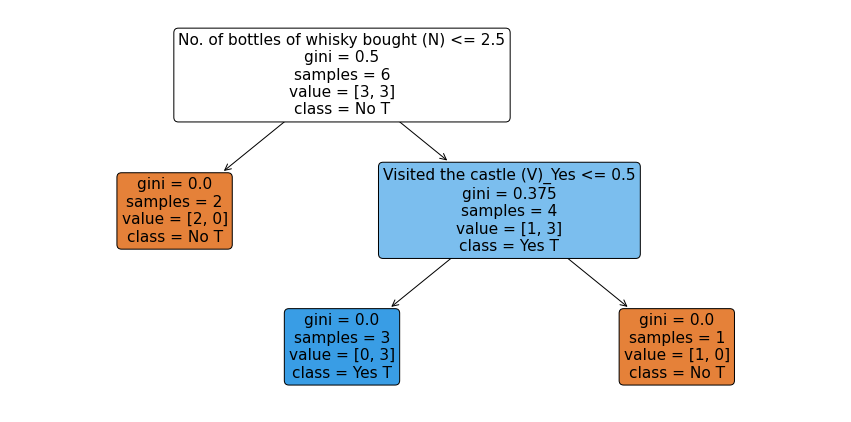

In [9]:
DT = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
plt.figure(figsize=(15,7.5))
plot_tree(DT,
          filled=True,
          rounded=True,
          class_names=['No T', 'Yes T'],
          feature_names=X_encoded.columns); # ; is used for not showing the text parameters at the begining

Accuracy: 0.5


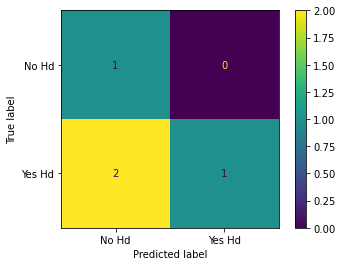

In [10]:
plot_confusion_matrix(DT, X_test, y_test, display_labels=['No Hd', 'Yes Hd'])
print('Accuracy:', accuracy_score(y_test, DT.predict(X_test)))

In [11]:
DT = DecisionTreeClassifier(random_state=0)

# using 5 fold cross val meaning that it creates 5 different Train and Test datasets and then correlates
scores = cross_val_score(DT, X_train, y_train, cv=2)
df = pd.DataFrame(data={'tree': range(2), 'accuracy': scores})
df


,tree,accuracy
0,0,0.666667
1,1,0.333333


Accuracy: 0.75


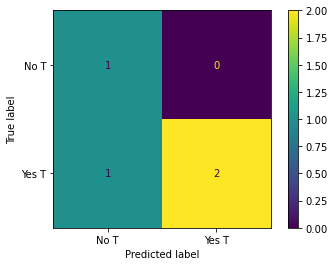

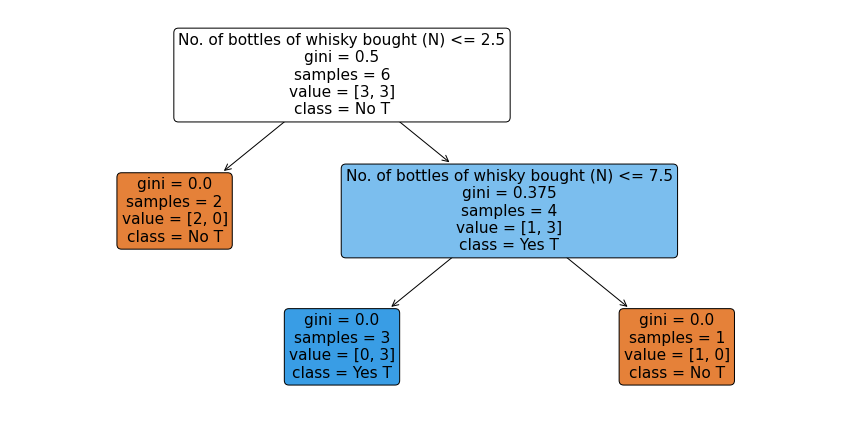

In [12]:
DT.fit(X_train, y_train)
plot_confusion_matrix(DT, X_test, y_test, display_labels=['No T', 'Yes T'])
print('Accuracy:', accuracy_score(y_test, DT.predict(X_test)))
plt.figure(figsize=(15,7.5))
plot_tree(DT,
          filled=True,
          rounded=True,
          class_names=['No T', 'Yes T'],
          feature_names=X_encoded.columns); # ; is used for not showing the text parameters at the begining